<a id="tercero"></a>
## 3. Clasificación. 

Para esta última parte de la tarea, utilizaremos un conjunto de datos de mediciones al corazón en pacientes con o sin cierta condicion cardiaca. El _dataset_ puede descargarse desde https://www.kaggle.com/shayanfazeli/heartbeat#ptbdb_abnormal.csv, utilizaremos en particular los archivos `ptbdb_normal.csv` y `ptbdb_abnormal.csv`. Nuestro objetivo principal será predecir a partir de las mediciones si un paciente tiene o no tiene la condición. Sin embargo también exploraremos técnicas de reducción de dimensionalidad para tratar de preprocesar los datos, pues una rápida exploración de los datos nos muestra que tenemos 188 atributos. 

#### 3.a Carga de datos
Cargue los datos, cree la columna `target` y junte ambos DataFrame en uno solo con método `append`. Por que es necesario pasar una lista de id al cargar los datos?

Explore rápidamente los datos: estan muy desbalanceadas las clases? Que tan dispares son las magnitudes de las mediciones? Pareciera necesario estandarizar los datos antes de utilizarlos? 

Separe los datos utilizando `train_test_split`. Qué habria ocurrido por la forma en que se cargaron los datos si utilizamos la opción `shuffle = False`? 

In [35]:
### Importar paquetes que se utilizarán

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import statsmodels.formula.api as smf


from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.decomposition import PCA



In [4]:
## Carga de datos asignándoles nombres de columnas del 0 al 187 
data_normal = pd.read_csv('../DATASETS/heartbeat/ptbdb_normal.csv',names=[i for i in range(188)])
data_abnormal = pd.read_csv('../DATASETS/heartbeat/ptbdb_abnormal.csv',names=[i for i in range(188)])

In [5]:
## data de las personas sin la condición cardiaca
data_normal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
## data de las personas con la condición cardiaca
data_abnormal.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [7]:
### Se unen ambos datasets y se generá la columna target 
data = pd.concat([data_normal,data_abnormal],axis=0)
data['target'] = data[187]
data.head()

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,target
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Conteo de personas con la condición cardiaca y si la condición cardiaca 0.0: Sin condición , 1.0 : con condición
data.groupby('target').count()[0]

target
0.0     4046
1.0    10506
Name: 0, dtype: int64

In [10]:
### resumen descriptivo de los datos numéricos
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,target
count,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,...,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.000000,14552.0,14552.000000,14552.000000
mean,0.976637,0.721663,0.403099,0.242893,0.207218,0.216453,0.221752,0.224486,0.227349,0.229704,...,0.001133,0.000900,0.000739,0.000661,0.000475,0.000177,0.000185,0.0,0.721963,0.721963
std,0.034532,0.195690,0.249794,0.249519,0.218097,0.192412,0.180740,0.176943,0.176674,0.176579,...,0.021012,0.017316,0.014640,0.014033,0.012289,0.006545,0.006835,0.0,0.448047,0.448047
min,0.624227,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.959377,0.584589,0.212300,0.052269,0.061875,0.090487,0.096503,0.097095,0.097231,0.097144,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,0.740148,0.371911,0.168148,0.136082,0.159451,0.167479,0.171541,0.177380,0.180337,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000
75%,1.000000,0.881483,0.557785,0.336232,0.264104,0.264633,0.286484,0.302255,0.311664,0.325292,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.985523,0.993213,0.997738,...,0.773743,0.789804,0.628177,0.602033,0.644880,0.371502,0.376668,0.0,1.000000,1.000000


#### Respuestas:

* Es necesario pasar una lista de id al cargar los datos para poder identificar cada columna 

* Podemos ver claramente que los datos se encuentran desbalanceados, en el cual se encuetran 4056 pacientes sin la condición cardiaca y 10506 con la condición cardiaca

* Observando el resumen descriptivo de los datos, podemos observar que las columnas poseen diferentes ordenes, lo que nos indica que sería efectivo normalizar o estandarizar las columnas

* Si  hubiesemos utilizado la opción shuffle = false en train_test_split nos hubiese considerado el mismo orden en que cargamos los datos, por lo que las muestras no serían representativas.

In [11]:
## Eliminamos las columnas 184,185,186 y 187 y separamos el dataset en conjunto de entrenamiento y conjunto de test
data = data.drop(columns=[184,185,186,187])
X_train , X_test = train_test_split(data,test_size=0.3)

#### 3.b Correlación
Calcule la matriz de correlación, note que esto esta implementado en pandas. Representela de alguna forma que le parezca adecuada, por ejemplo como un _heatmap_. 
Qué observa, comente.  Elimine las columnas que muestra el código. 

In [12]:
## Matrix de correlación de los datos
X_corre = X_train.corr()

Text(0.5, 1.0, 'Heatmap de la Matriz de Correlación')

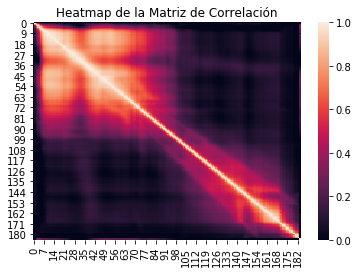

In [13]:

ax = sns.heatmap(X_corre, vmin=0, vmax=1)
plt.title("Heatmap de la Matriz de Correlación")


#### 3.c Regresión Logistica
Realice una primera regresión logística con los datos. Que valor entrega el metodo `score`?

Calcule la matriz de confusión y comente respecto al valor dado por el `score`. Comente sobre la distinta información entregrada por la matriz de confusión y su interpretación. 

In [14]:
y_train = X_train['target']
x_train = X_train.drop(columns=['target'])
y_test = X_test['target']
x_test = X_test.drop(columns=['target'])



## estandarización de los datos 
scaler_x = StandardScaler()
scaler_x.fit(x_train)
X_train_tf = scaler_x.transform(x_train)
X_test_tf = scaler_x.transform(x_test)


clf3 = LogisticRegression(solver='lbfgs').fit(X_train_tf,y_train)
prediccion = clf3.predict(X_test_tf)

/Users/macdiegordito/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [15]:
metrics.accuracy_score(y_test,prediccion)

0.8392120934493816

In [17]:
matriz = metrics.confusion_matrix(y_test,prediccion)

In [27]:
print("La matrix de confusión nos entrega la siguiente información:\n \n",
     matriz[0][0],"personas fueron clasificadas como persona sin la condición cardiaca y no tiene la condición cardiaca \n",
     matriz[0][1],"personas no tienen la condición y fueron clasificados como que si la tienen \n",
     matriz[1,0],"personas si tienen la condición y fueron clasificadas como que no la tienen,\n",
     matriz[1,1],"personas si tienen la condicion y fueron clasificadas como que si la tienen")

La matrix de confusión nos entrega la siguiente información:
 
 744 personas fueron clasificadas como persona sin la condición cardiaca y no tiene la condición cardiaca 
 452 personas no tienen la condición y fueron clasificados como que si la tienen 
 250 personas si tienen la condición y fueron clasificadas como que no la tienen,
 2920 personas si tienen la condicion y fueron clasificadas como que si la tienen


#### 3.d Otra métrica. 
Otra forma de comparar modelos podría ser con la siguiente métrica. Esta mide la cantidad de aciertos pero toma en cuenta algo más. Que interpretación podría darle a la métrica en el código? 

Si un modelo entrega 0.5 y otro 0.4 en esta métrica, cual es mejor? 

**Respuesta:**

* Esta métrica además de considerar la cantidad de errores, los va multiplicando por la probabilidad de que el modelo se haya equivocado en dicha etiqueta.
* Si un modelo entrega 0.5 y otro 0.4, nos deberiamos quedar con el segundo modelo

In [28]:
np.mean((np.max(clf3.predict_proba(x_test),axis=1)*(clf3.predict(x_test)-y_test))**2)

0.20350813510548788

#### 3.e PCA y LDA
Transforme los datos mediante PCA a 2 dimensiones y grafique un subsampleo de alrededor de 50 - 100 datos con 50% de cada clase. Coloree cada punto correspondiente a la clase a la que pertenece. 

Realice el mismo analisis para LDA, considerando el mismo conjunto de puntos. Cual de ambos métodos le parece más apropiado?

Grafíque el centro de gravedad (promedio en cada cordenada) de cada una de las clases luego de la reducción de dimensionalidad. 

In [29]:
## PCA con 2 componentes
pca = PCA(n_components=2)
X_train_acp = pca.fit_transform(x_train)

In [30]:
## dataframe auxiliar
new_df_pca = pd.DataFrame({'Var1':X_train_acp[:,0],'Var2':X_train_acp[:,1],'Target':y_train})
new_df_pca = new_df_pca.reset_index()
new_df_pca = new_df_pca.drop(columns='index')


In [31]:
new_df_pca.head()

,Var1,Var2,Target
0,-0.313539,0.440499,0.0
1,3.418770,-1.647470,1.0
2,-0.689652,-0.556968,1.0
3,-1.412000,0.329058,1.0
4,-1.416797,0.494413,1.0


In [32]:
tipo0 = new_df_pca[new_df_pca['Target']==0.0]
tipo1 = new_df_pca[new_df_pca['Target']==1.0]

In [33]:
sub_0 = pd.DataFrame.sample(tipo0,n=50,replace=False)
sub_1 = pd.DataFrame.sample(tipo1,n=50,replace=False)

sub_muestra = pd.concat([sub_0,sub_1])

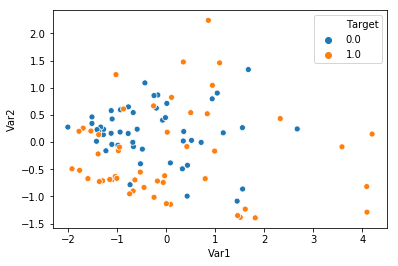

In [34]:
sns.scatterplot(x='Var1',y='Var2',hue='Target',data=sub_muestra)

In [36]:
Y = sub_muestra['Target'].tolist()
X = sub_muestra.drop(columns=['Target'])

In [37]:
X_train_1,X_val_1,Y_train_1,Y_val_1 = train_test_split(X,Y,test_size=0.25)

In [38]:
clasificador = LinearDiscriminantAnalysis().fit(X_train_1,Y_train_1)
prediccion = clasificador.predict(X_val_1)

In [39]:
metrics.confusion_matrix(Y_val_1,prediccion)

array([[6, 4],
       [7, 8]])

#### 3.f Más reducción de dimensionalidad
Entrene un modelo de regresión logística para el método que le pareció más apropiado de la pregunta aterior, haciendo variar el numero de componentes de 2 a 120. Calcule para cada modelo alguna métrica de la calidad del modelo tanto sobre el conjunto de entrenamiento como sobre el conjunto de validación. 

Grafíque como varían ambos errores en función de la dimensionalidad sobre la que se trabaja. 

Si le sobra *tiempo* y _c r e a t i v i d a d_  proponga cambios o extienda la exploración buscando mejorar el desempeño o comprender mejor el problema (solo para puntaje extra).

[//]: <> (  https://meme.xyz/uploads/posts/t/l-27712-i-procrastinate-to-the-last-minute-den-i-freaked-it.jpg )

In [40]:
## grilla de valores con la cantidad de componentes
componentes = np.arange(2,121)

In [41]:
## Creación de 119 modelos de PCA con de 2 hasta 120 dimensiones
X_pca = []
for i in componentes:
    pca = PCA(n_components=i)
    X_train_acp = pca.fit_transform(x_train)
    X_pca.append(X_train_acp)

    



In [50]:
## Ajuste de una regresión logística para cada uno de los modelos 
metrica = []
comp = []
for data in X_pca:
    X_train , X_val , Y_train , Y_val = train_test_split(X,Y,test_size=0.25)
    clf = LogisticRegression(solver='lbfgs').fit(X_train,Y_train)
    prediccion1 = clf.predict(X_val)
    accuracy = metrics.accuracy_score(Y_val,prediccion1)
    metrica.append(accuracy)
    comp.append(data.shape[1])
    
   

In [53]:
## Usamos como métrica el accuracy, esta métrica es apropiada debido a que ya arreglamos el problema de desbalanceo de la muestra
maximo = max(metrica)
indice = metrica.index(maximo)
componente_optimo = comp[indice]
componente_optimo

73

Text(0.5, 0, 'Número de componentes')

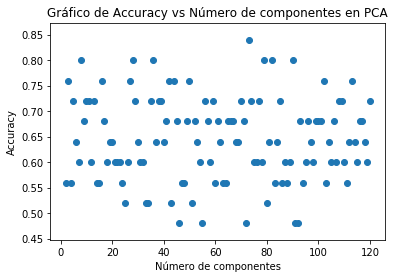

In [52]:
plt.scatter(x=comp,y=metrica)
plt.title("Gráfico de Accuracy vs Número de componentes en PCA")
plt.ylabel("Accuracy")
plt.xlabel("Número de componentes")